In [ ]:
import sys
import os
sys.path.append('..')
import src.svm_utils as svm_utils
import src.visualization_utils as viz_utils
import src.ds_utils as ds_utils
import torch
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from src.label_maps import CLASS_DICT
import pickle as pkl


sns.set()
BLUE = sns.color_palette("tab10")[0]
RED = sns.color_palette("tab10")[3]
ORANGE = sns.color_palette("tab10")[1]
BROWN = sns.color_palette("tab10")[5]
GRAY = sns.color_palette("tab10")[7]
GREEN = sns.color_palette("tab10")[2]

import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
          'figure.figsize': (5, 3),
         'axes.labelsize': 14,
         'axes.titlesize':16,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
pylab.rcParams.update(params)


In [2]:
cifar_label_list = np.array([CLASS_DICT['CIFAR'][u] for u in range(10)])

In [3]:
beton_root = "/mnt/cfs/projects/correlated_errors/betons"
experiment_root = "/mnt/cfs/projects/correlated_errors/experiments/cifar/cifar_0.25"

svm_name = "svm_cifar_0.25_unlabeled_normalized"
name = os.path.join(experiment_root, f"svm_checkpoints/{svm_name}.pt") # SVM output file
svm_model_name = os.path.join(experiment_root, f"svm_checkpoints/{svm_name}_model.pkl") # SVM output file
model_root = os.path.join(experiment_root, "models")
model_ckpt = os.path.join(model_root, "cifar10_0.25_unlabeled/version_0/checkpoints/checkpoint_last.pt")
loss_upweight_root = os.path.join(experiment_root, "loss_vec_files")
subset_root = os.path.join(experiment_root, "subset_index_files")

In [4]:
processor = viz_utils.SVMProcessor(name, root=beton_root, checkpoint_path=model_ckpt, get_unlabeled=True)


-----------train_metrics--------------
{'Confusion Matrix': array([[ 439,  192],
       [3195, 6174]]),
 'Model Accuracy': 0.9369,
 'SVM Accuracy': 0.661300003528595,
 'SVM Balanced Accuracy': 0.6773514151573181}
-----------val_metrics--------------
{'Confusion Matrix': array([[1593,  415],
       [1713, 6279]]),
 'Model Accuracy': 0.7992,
 'SVM Accuracy': 0.7871999740600586,
 'SVM Balanced Accuracy': 0.7894936800003052}
-----------test_metrics--------------
{'Confusion Matrix': array([[1346,  749],
       [2007, 5898]]),
 'Model Accuracy': 0.7905,
 'SVM Accuracy': 0.724399983882904,
 'SVM Balanced Accuracy': 0.6942960917949677}
-----------unlabeled_metrics--------------
{'Confusion Matrix': array([[ 3972,  2185],
       [ 5945, 17898]]),
 'Model Accuracy': 0.7947666666666666,
 'SVM Accuracy': 0.7289999723434448,
 'SVM Balanced Accuracy': 0.6978899836540222}
Using default os_cache: False
Using default quasi_random: True
Using default val_aug: None
Using default loss_vec_file: None
Usin

100%|██████████| 100/100 [00:05<00:00, 19.75it/s]


Accuracy 0.9538999795913696


100%|██████████| 100/100 [00:01<00:00, 73.17it/s]


Accuracy 0.7991999983787537


100%|██████████| 100/100 [00:01<00:00, 72.57it/s]


Accuracy 0.7904999852180481


100%|██████████| 300/300 [00:02<00:00, 140.90it/s]

Accuracy 0.7947999835014343


In [5]:
split = 'test'
test_dv = processor.metrics[f'{split}_metrics']['decision_values']
test_confs = processor.run_dict[split]['confs']
test_class = processor.metrics[f'{split}_metrics']['classes'] # 0 if female, 1 if male
test_pred_correct = processor.metrics[f'{split}_metrics']['ypred']
test_correct = processor.metrics[f'{split}_metrics']['ytrue']

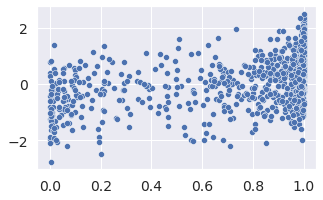

---- CONFIDENCE ------


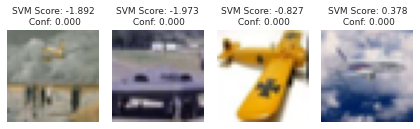

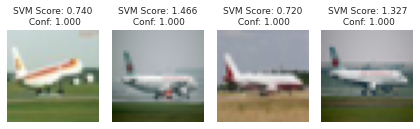

---- SVM ------


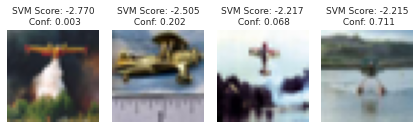

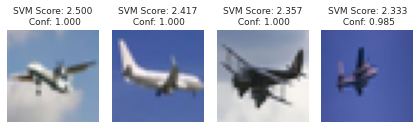

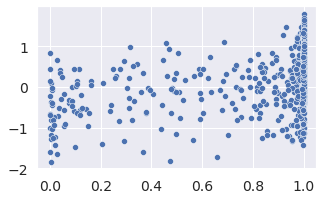

---- CONFIDENCE ------


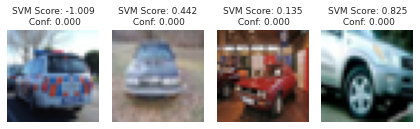

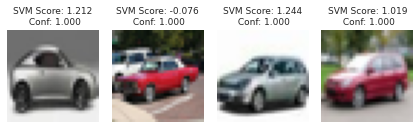

---- SVM ------


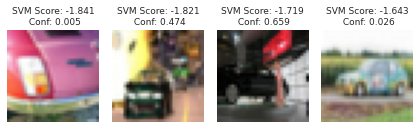

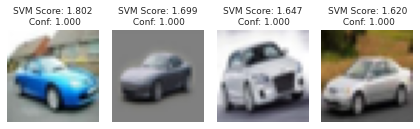

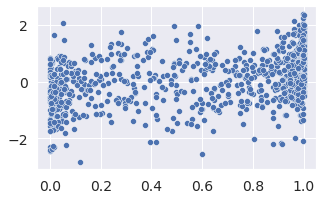

---- CONFIDENCE ------


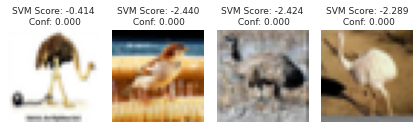

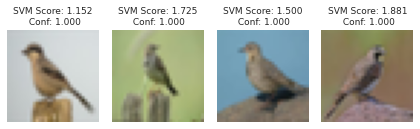

---- SVM ------


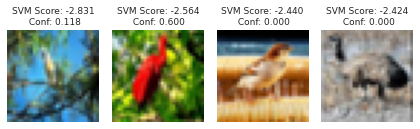

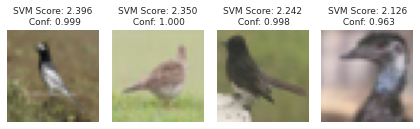

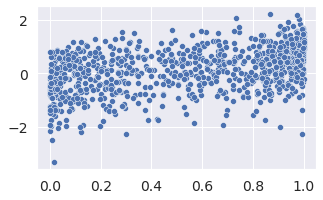

---- CONFIDENCE ------


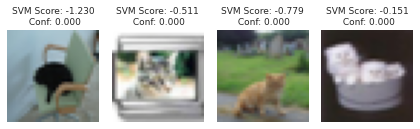

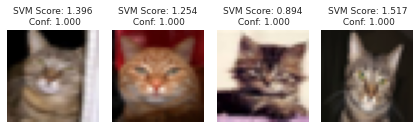

---- SVM ------


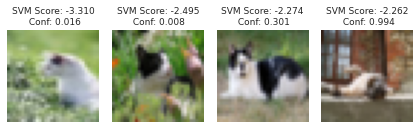

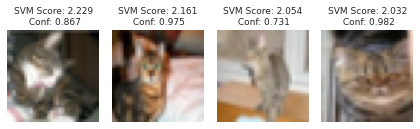

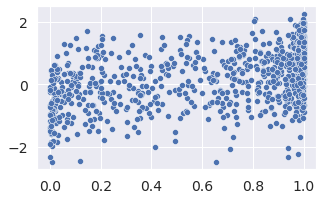

---- CONFIDENCE ------


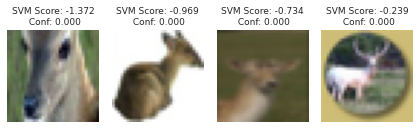

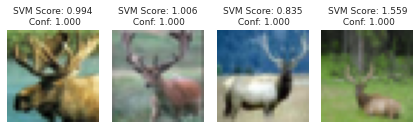

---- SVM ------


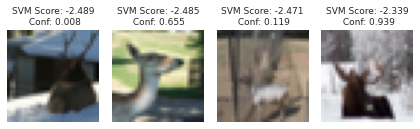

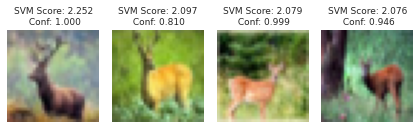

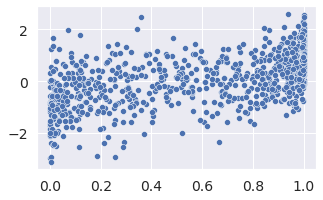

---- CONFIDENCE ------


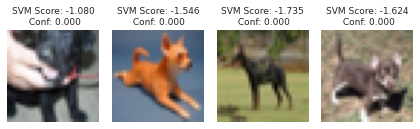

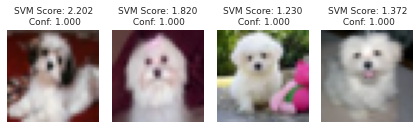

---- SVM ------


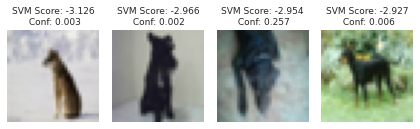

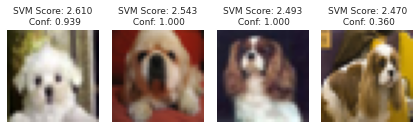

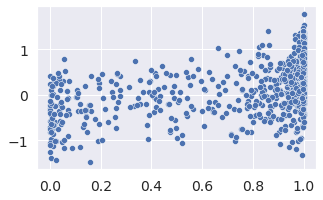

---- CONFIDENCE ------


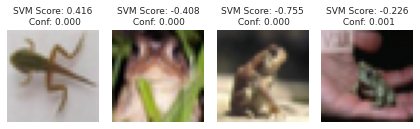

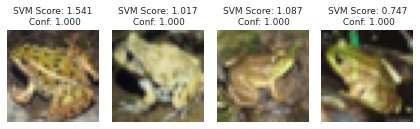

---- SVM ------


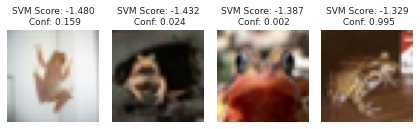

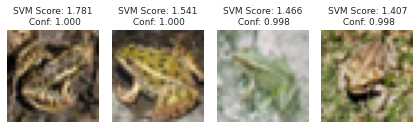

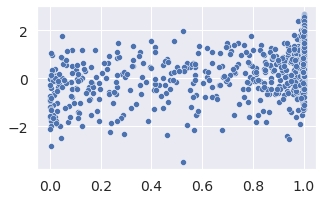

---- CONFIDENCE ------


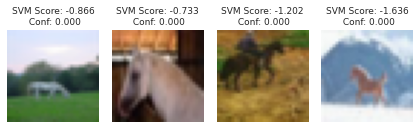

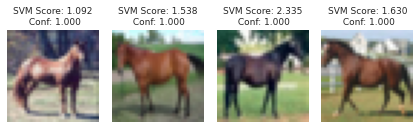

---- SVM ------


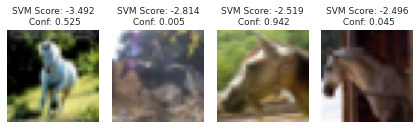

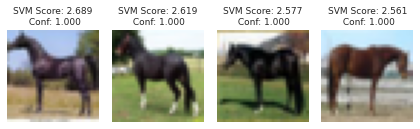

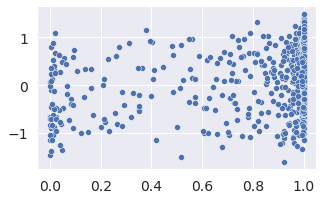

---- CONFIDENCE ------


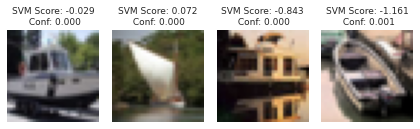

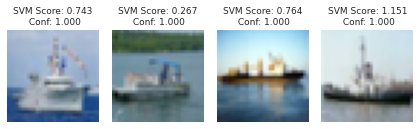

---- SVM ------


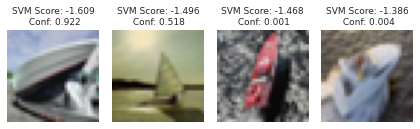

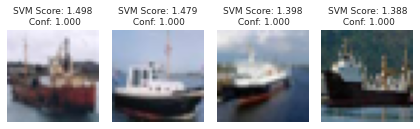

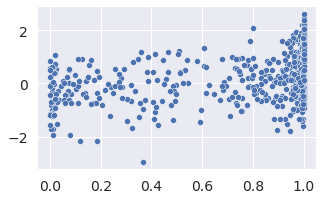

---- CONFIDENCE ------


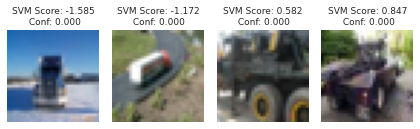

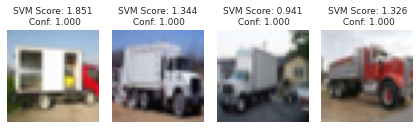

---- SVM ------


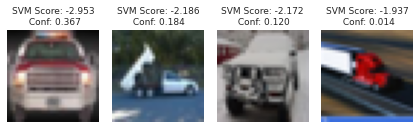

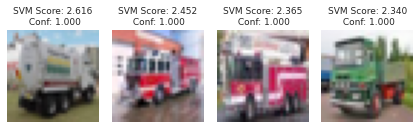

In [6]:
# display extremes for original model
os.makedirs('figures/cifar/', exist_ok=True)
for c in range(10):
    processor.display_extremes(c, split='test', columns=4, rows=1, filename=f'figures/cifar/{c}_extremes')

In [7]:
import src.clip_utils as clip_utils

In [8]:
import importlib
importlib.reload(clip_utils)

<module 'src.clip_utils' from '/mnt/nfs/home/saachij/src/CorrelatedErrors/src/clip_utils.py'>

In [9]:
clip_analyzer = clip_utils.ClipAnalyzer(
    processor=processor, svm_model_name=svm_model_name, class_names=cifar_label_list,
    clip_config_name='CIFAR10', do_normalize=True, exclude_common=True, method_type="WordNet")

100%|██████████| 300/300 [00:05<00:00, 51.42it/s]


consistent with old results 1.0
excluding weimaraner
excluding lapdog
excluding rottweiler
excluding coonhound
excluding ibizan hound
excluding coondog
excluding pekinese
excluding staffordshire bullterrier
excluding staffordshire bullterrier
excluding blenheim spaniel
excluding flat-coated retriever
excluding shetland sheepdog
excluding rhodesian ridgeback
excluding black-and-tan coonhound
excluding black-and-tan coonhound
excluding seizure-alert dog
excluding smooth-haired fox terrier
excluding housedog
excluding american staffordshire terrier
excluding sennenhunde
excluding bluetick
excluding brabancon griffon
excluding doberman
excluding appenzeller
excluding entlebucher
excluding bouvier des flandres
excluding bouvier des flandres
excluding bouvier des flandres
excluding curly-coated retriever
excluding soft-coated wheaten terrier
excluding great pyrenees
excluding old english sheepdog
excluding liver-spotted dalmatian
excluding bullterrier
excluding belgian sheepdog
excluding leo

  0%|          | 0/11 [00:00<?, ?it/s]

dog



100%|██████████| 56/56 [00:02<00:00, 23.39it/s]

100%|██████████| 1/1 [00:00<00:00, 27.64it/s]

100%|██████████| 1/1 [00:00<00:00, 82.25it/s]

  9%|▉         | 1/11 [00:12<02:07, 12.75s/it]

bird



100%|██████████| 260/260 [00:10<00:00, 23.69it/s]

100%|██████████| 3/3 [00:00<00:00, 18.67it/s]

100%|██████████| 1/1 [00:00<00:00, 116.25it/s]

 18%|█▊        | 2/11 [00:37<02:59, 19.99s/it]

automobile



100%|██████████| 9/9 [00:00<00:00, 21.27it/s]

100%|██████████| 1/1 [00:00<00:00, 59.22it/s]

100%|██████████| 1/1 [00:00<00:00, 71.59it/s]

 27%|██▋       | 3/11 [00:47<02:00, 15.12s/it]

airplane



100%|██████████| 9/9 [00:00<00:00, 20.82it/s]

100%|██████████| 1/1 [00:00<00:00, 89.89it/s]

100%|██████████| 1/1 [00:00<00:00, 111.03it/s]

 36%|███▋      | 4/11 [00:56<01:30, 12.96s/it]

truck



100%|██████████| 8/8 [00:00<00:00, 22.60it/s]

100%|██████████| 1/1 [00:00<00:00, 69.51it/s]

100%|██████████| 1/1 [00:00<00:00, 98.86it/s]

 45%|████▌     | 5/11 [01:06<01:09, 11.64s/it]

ship



100%|██████████| 42/42 [00:01<00:00, 22.81it/s]

100%|██████████| 1/1 [00:00<00:00, 35.13it/s]

100%|██████████| 1/1 [00:00<00:00, 80.52it/s]

 55%|█████▍    | 6/11 [01:17<00:58, 11.65s/it]

frog



100%|██████████| 15/15 [00:00<00:00, 22.17it/s]

100%|██████████| 1/1 [00:00<00:00, 37.44it/s]

100%|██████████| 1/1 [00:00<00:00, 76.61it/s]

 64%|██████▎   | 7/11 [01:27<00:44, 11.10s/it]

cat



100%|██████████| 12/12 [00:00<00:00, 21.54it/s]

100%|██████████| 1/1 [00:00<00:00, 67.40it/s]

100%|██████████| 1/1 [00:00<00:00, 86.64it/s]

 73%|███████▎  | 8/11 [01:37<00:31, 10.56s/it]

horse



100%|██████████| 17/17 [00:00<00:00, 22.01it/s]

100%|██████████| 1/1 [00:00<00:00, 61.15it/s]

100%|██████████| 1/1 [00:00<00:00, 96.41it/s]

 82%|████████▏ | 9/11 [01:46<00:20, 10.33s/it]

deer



100%|██████████| 18/18 [00:00<00:00, 21.68it/s]

100%|██████████| 1/1 [00:00<00:00, 65.66it/s]

100%|██████████| 1/1 [00:00<00:00, 115.89it/s]

 91%|█████████ | 10/11 [01:57<00:10, 10.28s/it]

reference



100%|██████████| 11/11 [01:59<00:00, 10.84s/it]


In [10]:
# c = 5
# clip_analyzer.get_svm_style_top_K(c, 'all')
# print("-------------------------------------")
# clip_result = clip_analyzer.perform_closest_to_top_K(c, 'all')

0.6642218046323067
performing classify captions on svm
airplane a photo of a airplane
{'neg_captions': array(['a photo of a red bomber', 'a photo of a red bomber inside',
       'a photo of a red reconnaissance plane inside',
       'a photo of a red bomber in the air',
       'a photo of a red reconnaissance plane',
       'a photo of a red bomber flying',
       'a photo of a red bomber outside',
       'a photo of a red reconnaissance plane outside',
       'a photo of a red dive bomber inside',
       'a photo of a red dive bomber'], dtype='<U62'),
 'neg_latents': array([[ 0.40234375,  0.3310547 ,  0.11962891, ..., -0.29614258,
        -0.16174316, -0.15063477],
       [ 0.17114258,  0.28833008, -0.00578308, ..., -0.1303711 ,
        -0.01207733, -0.10205078],
       [ 0.08892822,  0.19104004,  0.06964111, ...,  0.17089844,
         0.11895752, -0.14978027],
       ...,
       [ 0.1875    ,  0.22229004,  0.19628906, ...,  0.11120605,
         0.05410767, -0.15124512],
       [ 0.22

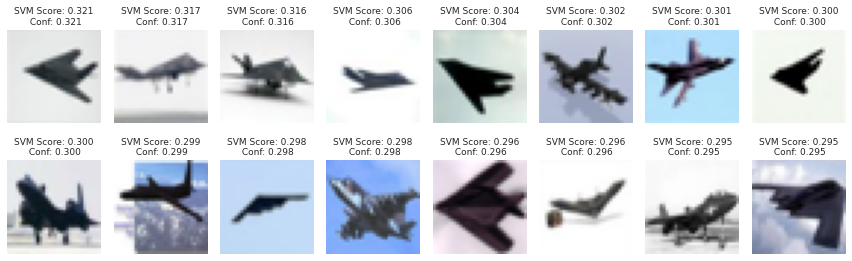

neg: a photo of a red bomber


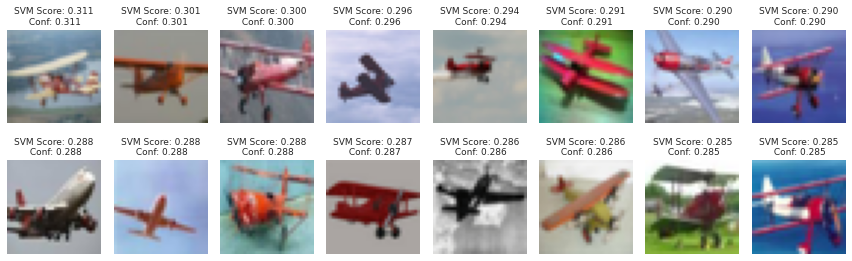

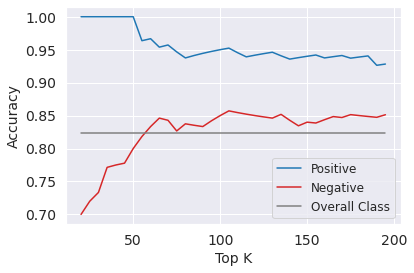

0.7010094305812045
performing classify captions on svm
automobile a photo of a automobile
{'neg_captions': array(['a photo of a ambulance', 'a photo of a ambulance outside',
       'a photo of a ambulance inside', 'a photo of a ambulance parked',
       'a photo of a brown ambulance inside',
       'a photo of a brown ambulance outside',
       'a photo of a brown ambulance',
       'a photo of a white ambulance inside',
       'a photo of a white ambulance outside', 'a photo of a stock car'],
      dtype='<U60'),
 'neg_latents': array([[ 0.12420654,  0.26513672,  0.05404663, ..., -0.42651367,
        -0.22277832, -0.23608398],
       [ 0.04214478,  0.35351562,  0.12457275, ..., -0.421875  ,
        -0.1953125 , -0.18127441],
       [ 0.02946472,  0.22460938, -0.01306152, ..., -0.36157227,
        -0.04229736, -0.23498535],
       ...,
       [-0.04544067,  0.05548096,  0.15637207, ..., -0.2631836 ,
        -0.17590332, -0.40185547],
       [-0.03598022,  0.1418457 ,  0.24584961, ..., 

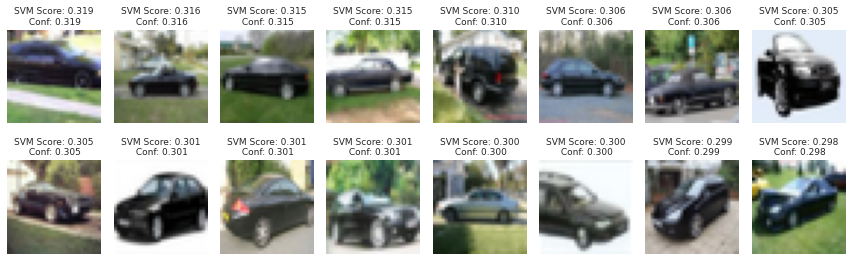

neg: a photo of a ambulance


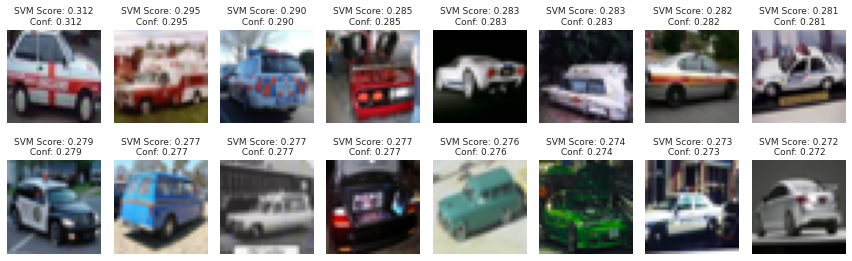

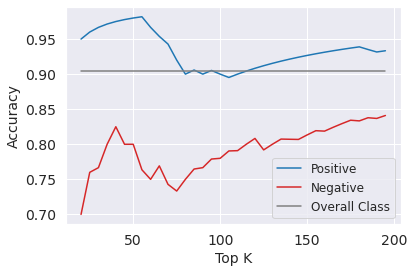

0.6696851119624674
performing classify captions on svm
bird a photo of a bird
{'neg_captions': array(['a photo of a white oscine inside',
       'a photo of a white twitterer inside',
       'a photo of a white twitterer flying',
       'a photo of a honey guide inside',
       'a photo of a orange twitterer inside',
       'a photo of a white honey guide inside',
       'a photo of a twitterer flying',
       'a photo of a white oscine in the air',
       'a photo of a red twitterer inside', 'a photo of a cackler inside'],
      dtype='<U65'),
 'neg_latents': array([[-0.19787598,  0.35180664, -0.18273926, ..., -0.22424316,
        -0.00212288, -0.14990234],
       [-0.19238281, -0.24230957, -0.13244629, ..., -0.2902832 ,
        -0.1192627 ,  0.04653931],
       [ 0.20739746,  0.26538086, -0.18127441, ..., -0.27539062,
         0.1315918 , -0.51220703],
       ...,
       [ 0.06121826,  0.2939453 , -0.21179199, ..., -0.28076172,
         0.08734131, -0.5449219 ],
       [-0.18310547, 

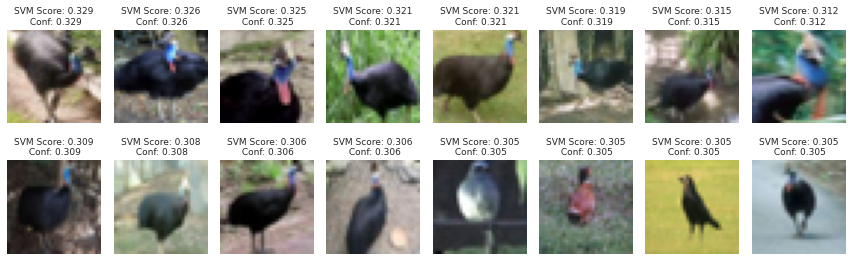

neg: a photo of a white oscine inside


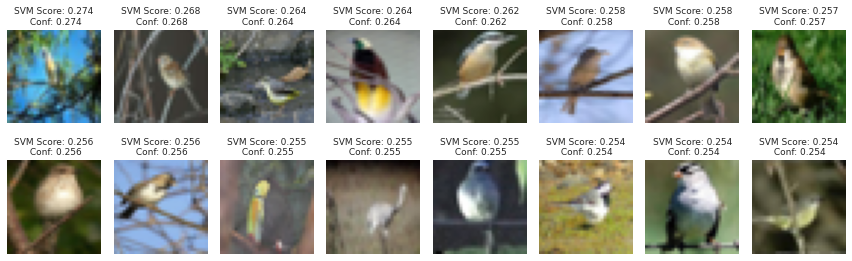

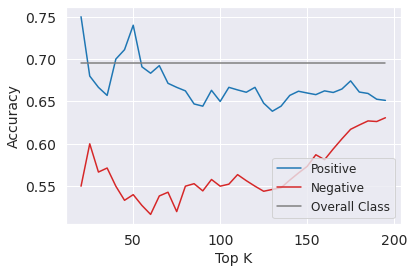

0.6415698284604889
performing classify captions on svm
cat a photo of a cat
{'neg_captions': array(['a photo of a white mouser on the grass',
       'a photo of a blue mouser on the grass',
       'a photo of a white ocelot on the grass',
       'a photo of a green mouser on the grass',
       'a photo of a blue ocelot on the grass',
       'a photo of a red mouser on the grass',
       'a photo of a white cougar on the grass',
       'a photo of a green cougar on the grass',
       'a photo of a blue cougar on the grass',
       'a photo of a white persian cat on the grass'], dtype='<U60'),
 'neg_latents': array([[-0.22460938, -0.3330078 ,  0.10137939, ..., -0.07220459,
        -0.24157715, -0.1005249 ],
       [-0.10253906, -0.3071289 ,  0.01441193, ..., -0.12561035,
        -0.27807617,  0.24780273],
       [-0.16931152, -0.42285156, -0.13513184, ...,  0.3215332 ,
        -0.22241211,  0.01618958],
       ...,
       [ 0.06045532, -0.10473633, -0.03530884, ..., -0.09442139,
        

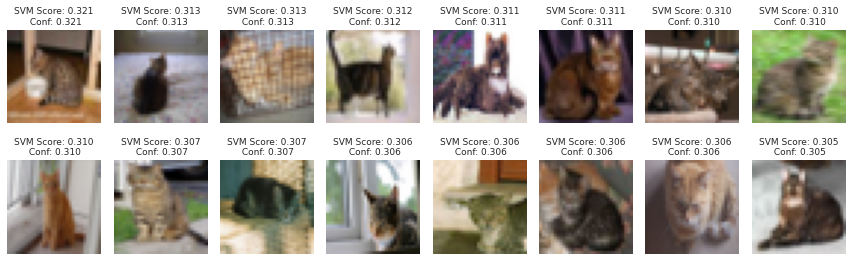

neg: a photo of a white mouser on the grass


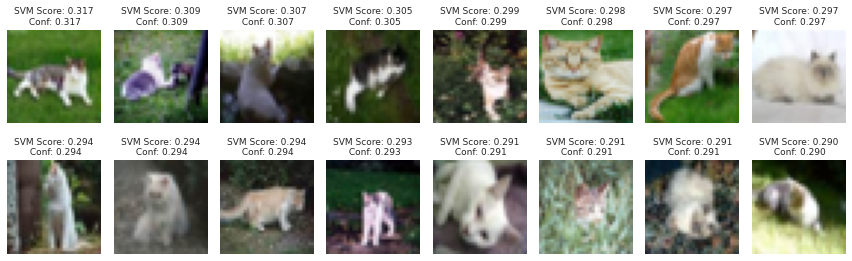

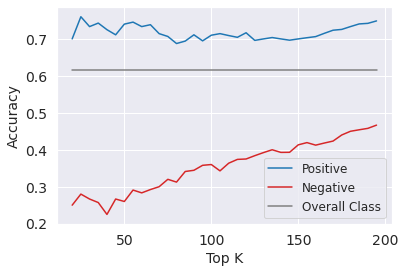

0.6484821828610479
performing classify captions on svm
deer a photo of a deer
{'neg_captions': array(['a photo of a kob inside', 'a photo of a kob',
       'a photo of a sassaby', 'a photo of a kob in the snow',
       'a photo of a white kob in the snow',
       'a photo of a white kob inside', 'a photo of a sassaby inside',
       'a photo of a white sassaby in the snow',
       'a photo of a sassaby outside', 'a photo of a sassaby in the snow'],
      dtype='<U63'),
 'neg_latents': array([[-0.21313477,  0.21984863, -0.04553223, ..., -0.5048828 ,
        -0.13024902,  0.23999023],
       [-0.1430664 ,  0.29541016,  0.08148193, ..., -0.63916016,
        -0.24658203,  0.22253418],
       [-0.24780273,  0.00619125, -0.10748291, ..., -0.828125  ,
        -0.08300781, -0.27929688],
       ...,
       [-0.18029785, -0.01216125,  0.03143311, ..., -0.6254883 ,
        -0.01971436, -0.93359375],
       [-0.24365234,  0.09240723, -0.07019043, ..., -0.88378906,
        -0.09399414, -0.26611328]

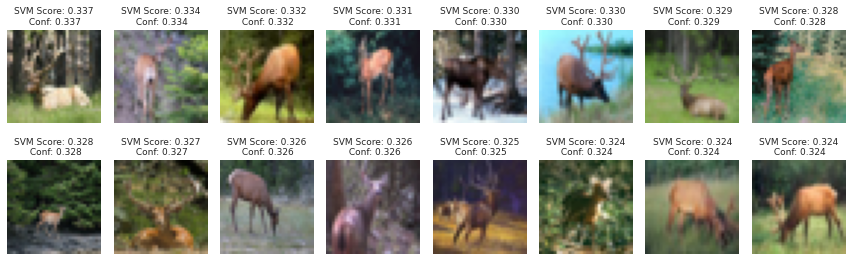

neg: a photo of a kob inside


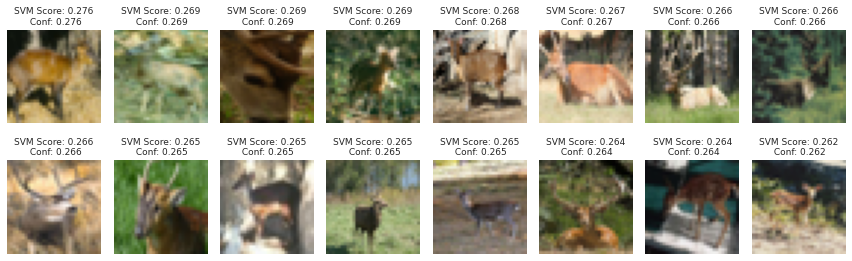

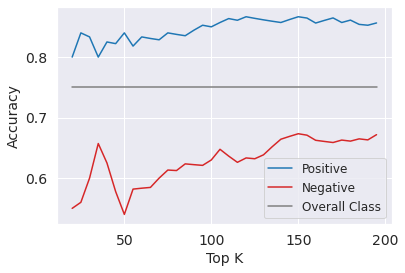

0.6876278118609407
performing classify captions on svm
dog a photo of a dog
{'neg_captions': array(['a photo of a black feist', 'a photo of a black feist outside',
       'a photo of a feist', 'a photo of a black mexican hairless inside',
       'a photo of a brown feist', 'a photo of a black mexican hairless',
       'a photo of a brown mexican hairless inside',
       'a photo of a black mexican hairless outside',
       'a photo of a black feist inside', 'a photo of a green feist'],
      dtype='<U69'),
 'neg_latents': array([[ 0.12133789, -0.13049316, -0.18469238, ..., -0.18811035,
        -0.08807373,  0.34472656],
       [ 0.1743164 , -0.02998352, -0.17297363, ..., -0.11114502,
        -0.02444458,  0.29516602],
       [-0.04147339, -0.03503418, -0.1817627 , ..., -0.43920898,
        -0.17858887,  0.35595703],
       ...,
       [ 0.01125336, -0.02586365, -0.17687988, ...,  0.2479248 ,
         0.11480713, -0.08312988],
       [ 0.12548828, -0.21179199, -0.27001953, ..., -0.22265

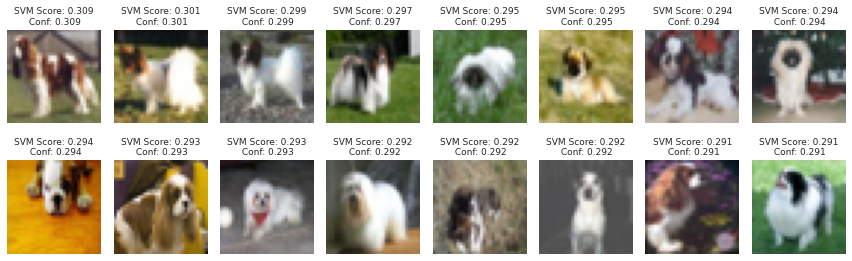

neg: a photo of a black feist


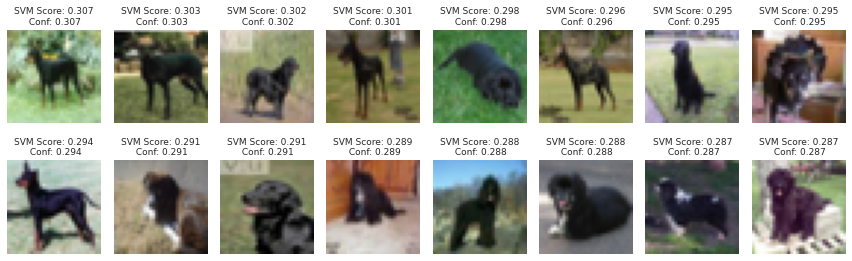

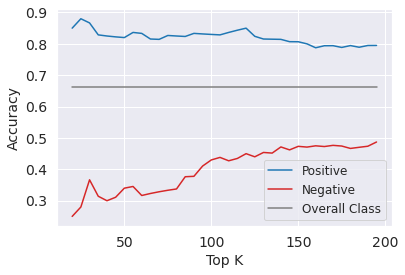

0.6769806482669898
performing classify captions on svm
frog a photo of a frog
{'neg_captions': array(['a photo of a agua', 'a photo of a agua inside',
       'a photo of a agua outside', 'a photo of a black agua inside',
       'a photo of a black agua', 'a photo of a black agua outside',
       'a photo of a brown agua', 'a photo of a brown agua inside',
       'a photo of a white agua inside',
       'a photo of a brown agua outside'], dtype='<U68'),
 'neg_latents': array([[-0.15539551,  0.38842773,  0.18395996, ..., -0.27172852,
         0.03182983,  0.05926514],
       [-0.22338867,  0.43310547,  0.12854004, ..., -0.2775879 ,
         0.12487793, -0.04107666],
       [-0.17834473,  0.54785156,  0.14880371, ..., -0.26782227,
         0.12792969,  0.09936523],
       ...,
       [-0.05645752,  0.5541992 ,  0.08099365, ..., -0.26611328,
         0.05380249, -0.13513184],
       [-0.3305664 ,  0.39892578,  0.234375  , ..., -0.25219727,
         0.1451416 , -0.24047852],
       [ 0.0176

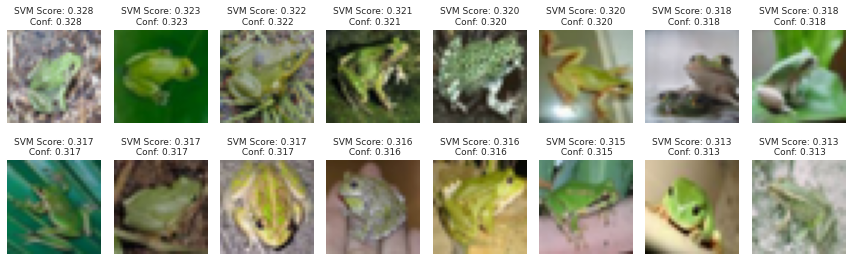

neg: a photo of a agua


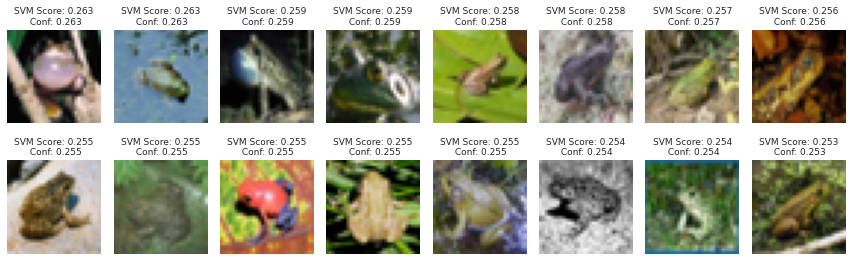

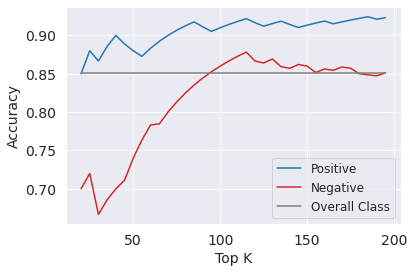

0.6935678717699402
performing classify captions on svm
horse a photo of a horse
{'neg_captions': array(['a photo of a protohippus inside',
       'a photo of a blue eohippus inside', 'a photo of a blue eohippus',
       'a photo of a wild horse', 'a photo of a white eohippus inside',
       'a photo of a blue steed inside', 'a photo of a eohippus inside',
       'a photo of a blue tarpan inside',
       'a photo of a green eohippus inside', 'a photo of a tarpan inside'],
      dtype='<U63'),
 'neg_latents': array([[-0.19152832,  0.33569336, -0.37426758, ..., -0.1784668 ,
        -0.23901367, -0.2548828 ],
       [-0.30151367,  0.00454712, -0.097229  , ..., -0.07922363,
        -0.12573242,  0.17163086],
       [-0.20483398,  0.07666016,  0.11791992, ...,  0.05581665,
        -0.10498047,  0.10809326],
       ...,
       [-0.19311523,  0.21801758,  0.01013947, ..., -0.04428101,
        -0.46240234,  0.06469727],
       [-0.3527832 ,  0.10040283, -0.28833008, ..., -0.05725098,
         0

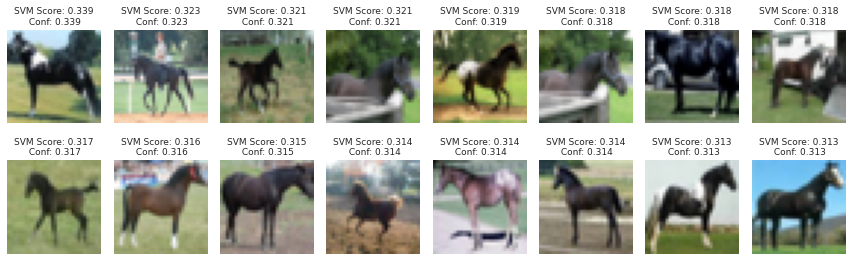

neg: a photo of a protohippus inside


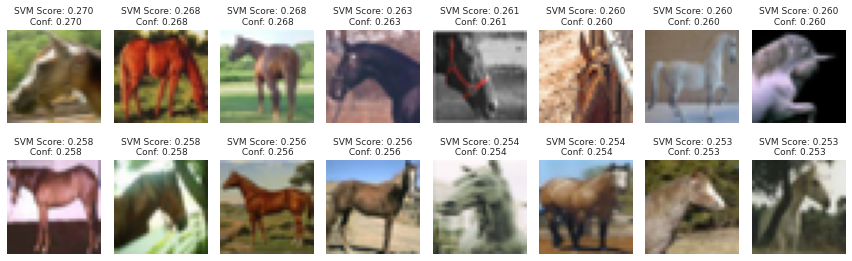

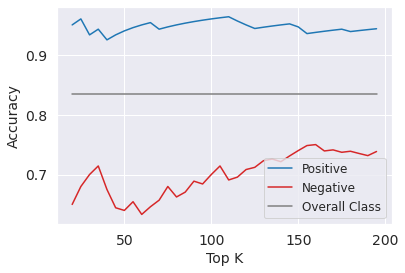

0.6241176656968883
performing classify captions on svm
ship a photo of a ship
{'neg_captions': array(['a photo of a racing gig', 'a photo of a blue racing gig outside',
       'a photo of a racing gig outside', 'a photo of a blue racing gig',
       'a photo of a racing gig inside',
       'a photo of a blue racing gig inside',
       'a photo of a blue sloop of war outside',
       'a photo of a white racing gig outside',
       'a photo of a blue racing gig on the horizon',
       'a photo of a blue sloop of war'], dtype='<U75'),
 'neg_latents': array([[ 0.23352051,  0.05688477,  0.03659058, ...,  0.1182251 ,
         0.07867432, -0.18408203],
       [ 0.1973877 ,  0.05474854,  0.03323364, ..., -0.02166748,
         0.10821533,  0.00701904],
       [ 0.19897461,  0.00313377,  0.03408813, ..., -0.02537537,
         0.21862793, -0.04248047],
       ...,
       [ 0.03050232,  0.02450562,  0.16027832, ..., -0.11230469,
         0.15429688, -0.28881836],
       [ 0.20385742, -0.01576233, 

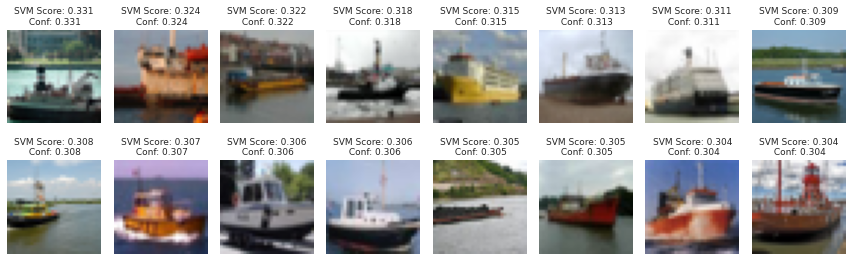

neg: a photo of a racing gig


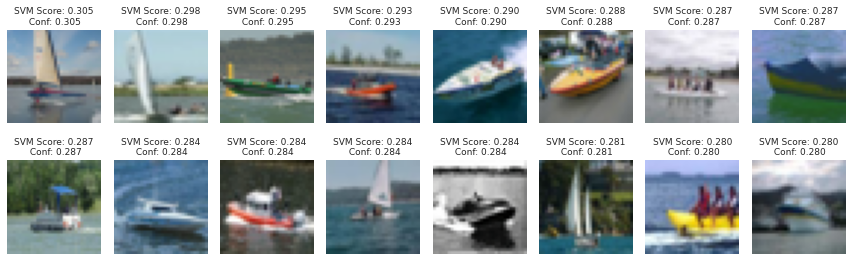

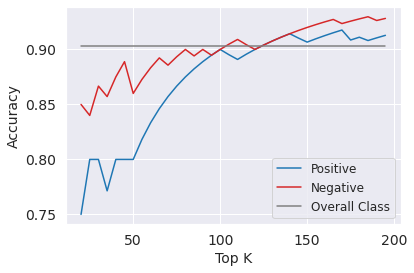

0.6601421725872243
performing classify captions on svm
truck a photo of a truck
{'neg_captions': array(['a photo of a white passenger van',
       'a photo of a white passenger van inside',
       'a photo of a white passenger van on the road',
       'a photo of a white passenger van outside',
       'a photo of a blue passenger van on the road',
       'a photo of a blue passenger van',
       'a photo of a brown passenger van on the road',
       'a photo of a blue passenger van inside',
       'a photo of a blue passenger van outside',
       'a photo of a orange passenger van on the road'], dtype='<U56'),
 'neg_latents': array([[ 0.06085205,  0.1538086 ,  0.15808105, ...,  0.2578125 ,
        -0.05770874, -0.17041016],
       [-0.01950073,  0.22399902,  0.05929565, ...,  0.19226074,
        -0.0252533 , -0.18774414],
       [-0.05560303,  0.16906738,  0.1418457 , ...,  0.2578125 ,
         0.01347351, -0.16577148],
       ...,
       [ 0.1895752 ,  0.10601807, -0.03024292, ...,  0

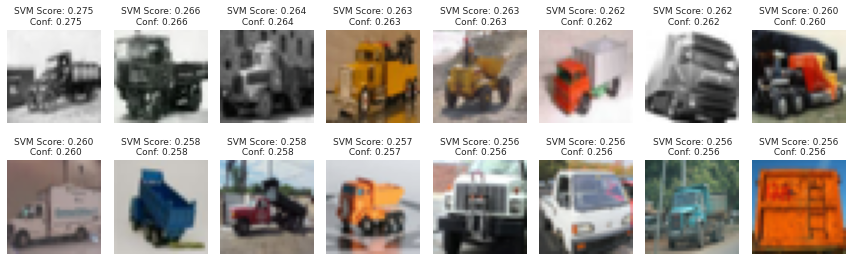

neg: a photo of a white passenger van


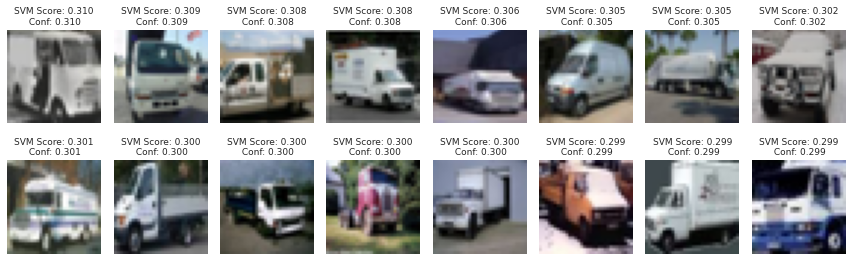

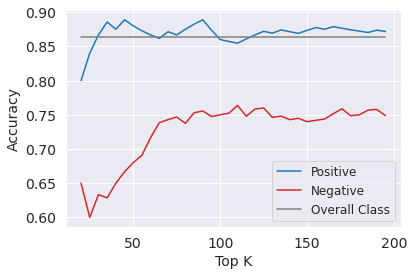

In [16]:
def get_cdf(arr, K_range=None):
    out = []
    if K_range is None:
        K_range = np.arange(10, len(arr), 10)
    for K in K_range:
        out.append(arr[:K].mean())
    out = np.array(out)
    return out, K_range

saved_caption_and_most_relevant_imgs = {}
df_dict = {}
for METHOD in ['CLASSIFY']:
    all_dfs = []
    for target_class in range(10):
        print(processor.metrics['cv_scores'][target_class])

        if METHOD == 'CLOSEST':
            print("performing closest")
            result = clip_analyzer.perform_closest_to_top_K(target_class, 'all')
        else:
            print("performing classify captions on svm")
            result = clip_analyzer.get_svm_style_top_K(target_class, 'all')
        print("--------")

        cdfs = {}
        class_mask = test_class==target_class
        masked_indices = np.arange(len(test_class))[class_mask]
        # K_range = np.arange(10, len(masked_indices), 10)
        K_range=np.arange(20, 200, 5)
        for caption_index in range(1):
            for direction in ['pos', 'neg']:
                caption_text = result[f'{direction}_captions'][caption_index]
                print(f"{direction}: {caption_text}")
                top_caption_latent = torch.tensor(result[f'{direction}_latents'][caption_index]).cuda()

                image_latents = clip_analyzer.clip_features['test'][class_mask].cuda()
                image_angles = clip_utils.order_descriptions_angle(mean_point=top_caption_latent.unsqueeze(0), query_points=image_latents)
                image_order = np.argsort(image_angles)[::-1]
                saved_caption_and_most_relevant_imgs[(METHOD, target_class, caption_index, direction)] = (masked_indices[image_order], caption_text)
                dir_name = 'Positive' if direction == 'pos' else 'Negative' 
                cdfs[dir_name], _ = get_cdf(test_correct[masked_indices[image_order]], K_range)
                # uncomment this to display the images
                processor._display_images(taken_index=masked_indices[image_order], taken_scores=image_angles[image_order],
                            taken_confs=image_angles[image_order], split="test", filename=f'figures/cifar/images_closest_to_caption/images_closest_to_caption_{target_class}_{direction}')

            df = pd.DataFrame()
            df['Top K'] = K_range
            for d, v in cdfs.items():
                df[d] = v
            df['Overall Class'] = test_correct[masked_indices].mean()
            df = df.melt('Top K', var_name='Order', value_name='Accuracy')
            all_dfs.append(df)
            fig, ax = plt.subplots(1, 1, figsize=(6,4))
            sns.lineplot(data=df, x='Top K', y='Accuracy', hue='Order', ax=ax, 
                         hue_order=['Positive', 'Negative', 'Overall Class'], 
                        palette=[BLUE, RED, GRAY])
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles=handles, labels=labels)
#             plt.axhline(y=test_correct[masked_indices].mean(), xmin=0, xmax=K_range[-1], color='gray')
            plt.savefig(f'figures/cifar/{target_class}_closest_images.pdf', bbox_inches='tight')
            plt.show()
    df_dict[METHOD] = all_dfs
    

In [14]:
os.makedirs("figures/cifar/images_closest_to_caption")

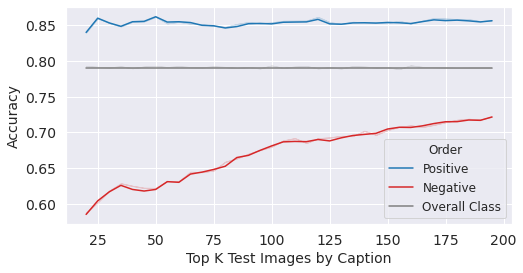

In [12]:
combined_df = pd.concat(df_dict['CLASSIFY']).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.lineplot(data=combined_df, x='Top K', y='Accuracy', hue='Order', ax=ax, 
             hue_order=['Positive', 'Negative', 'Overall Class'], 
            palette=[BLUE, RED, GRAY], ci=False)
# handles, labels = ax.get_legend_handles_labels()
labels[-1] = 'Overall Accuracy'
# ax.legend(handles=handles, labels=labels)
ax.set_xlabel("Top K Test Images by Caption")
plt.savefig(f'figures/cifar/ALL_closest_images.pdf', bbox_inches='tight')
plt.show()

In [13]:
labels

['Positive', 'Negative', 'Overall Accuracy']

# Subset Intervention

In [14]:
split = 'unlabeled'
unlabeled_dv = processor.metrics[f'{split}_metrics']['decision_values']
unlabeled_confs = processor.run_dict[split]['confs']
unlabeled_class = processor.metrics[f'{split}_metrics']['classes'] # 0 if female, 1 if male
unlabeled_pred_correct = processor.metrics[f'{split}_metrics']['ypred']
unlabeled_correct = processor.metrics[f'{split}_metrics']['ytrue']

In [ ]:
import scipy.stats as scipy_stats
import pandas as pd
rand_perm = np.arange(len(unlabeled_dv))
np.random.shuffle(rand_perm)

all_dv_inds = []
all_conf_inds = []
all_random_inds = []
K_range = np.arange(50, 201, 50)
for K in K_range:
    dv_inds = []
    conf_inds = []
    random_inds = []
    for c in range(processor.hparams['num_classes']):
        mask = unlabeled_class == c
        masked_indices = np.arange(len(mask))[mask]
        N = len(unlabeled_dv[mask])
        dv_order = masked_indices[np.argsort(unlabeled_dv[mask])]
        conf_order = masked_indices[np.argsort(unlabeled_confs[mask])]
        random_order = masked_indices[np.argsort(rand_perm[mask])]
        dv_inds.append(dv_order[:K])
        conf_inds.append(conf_order[:K])
        random_inds.append(random_order[:K])
        
    all_dv_inds.append(np.concatenate(dv_inds))
    all_conf_inds.append(np.concatenate(conf_inds))
    all_random_inds.append(np.concatenate(random_inds))

In [ ]:
indices_file = torch.load(processor.metrics['args']['indices_file'])
u_indices = indices_file['unlabeled_indices']
for name, order in [("dv", all_dv_inds), ('confs', all_conf_inds), ('random', all_random_inds)]:
    for i in range(len(all_dv_inds)):
        subset_indices_dict = {
            'val_indices': indices_file['val_indices'],
            'train_indices': torch.cat([indices_file['train_indices'],u_indices[order[i]]]),
        }
        torch.save(subset_indices_dict, os.path.join(subset_root, name, f'{i}.pt'))


# Analyze results

In [21]:
saved_caption_and_most_relevant_imgs # (METHOD, target_class, caption_index, direction)

{('CLASSIFY',
  0,
  0,
  'pos'): (array([9802, 8812, 4415, 1078, 9980, 4515, 5055,   21, 2892, 8554, 8800,
         4824, 9392, 2400, 1744, 6355, 2368,  382, 1103, 9495, 6247, 1319,
         8769, 9772, 5716, 2672, 1646, 4840, 4305, 7692, 7523, 7196, 5652,
         4802, 1446, 2956, 1902, 5857, 9544, 5091,  791, 4939, 6350, 9946,
         5475, 7929, 8017, 2124, 5735, 4123, 4167, 1365, 2507, 1295,  215,
         1748, 7607, 2622, 8230, 6923, 6772, 7465,  244, 5260, 5524, 3475,
         5583, 9973, 9356, 3845,  315, 9111, 4037, 8894, 6549, 2463, 4118,
         3177, 1343, 5043, 5077,  406, 3445, 6797, 7428, 7684,  527,  338,
         9700, 2344, 7742, 3792, 2122, 9473, 1851, 4270, 2879, 7544, 7696,
         6418, 6351, 6294, 1912, 9413, 9852, 9459, 1785, 7189, 2087, 6261,
         3112, 6462, 3048, 8941, 7871, 2570, 5649,  499, 8267, 9642, 9766,
         1555, 4558, 1776,  447, 9876, 6860, 3087, 4194, 8925, 4040,  297,
         4759, 3866, 9235, 2792, 5357, 3063, 3536, 3965, 1652, 9539

In [22]:
K_range = np.arange(50, 201, 50)
load_corrects = {}
for t in ['dv', 'confs', 'random', 'baseline']:
    for i in range(len(K_range)):
        load_corrects[(t, K_range[i])] = []
        for v in range(10):
            if t == 'baseline':
                is_corrects = torch.tensor(test_correct)
            else:
                path = os.path.join(model_root, f"cifar_0.25_subset_{t}_{i}/version_{v}/metrics.pt")
                out = torch.load(path)
                is_corrects = (out['test']['preds'] == out['test']['classes'])
            load_corrects[(t, K_range[i])].append(is_corrects)
            

In [26]:
K = 100
METHOD = "CLASSIFY"
all_dfs = []
for v in range(10):
    dfs = []
    for target_c in range(10):
        xaxis = np.arange(20, 200, 5)
        indices, caption = saved_caption_and_most_relevant_imgs[(METHOD, target_c, 0, 'neg')]
        print(caption)
        dv_intervention, _ = get_cdf(load_corrects[('dv', K)][v][indices].float(), xaxis)
        confs_intervention, _ = get_cdf(load_corrects[('confs', K)][v][indices].float(), xaxis)
        baseline_intervention, _ = get_cdf(load_corrects[('baseline', K)][v][indices].float(), xaxis)
        random_intervention, _ = get_cdf(load_corrects[('random', K)][v][indices].float(), xaxis)

        df = pd.DataFrame()
        df['Top K'] = xaxis
        df['SVM Decision Value'] = dv_intervention
        df['Confidence'] = confs_intervention
        df['Base Model'] = baseline_intervention
        df['Random'] = random_intervention
        df = df.melt('Top K', var_name='Order', value_name='Subpopulation Accuracy')
        df['Class'] = target_c
        dfs.append(df)
    combined_df = pd.concat(dfs).reset_index()
    combined_df = combined_df.groupby(['Top K', 'Order']).mean().reset_index()[['Top K', 'Order', 'Subpopulation Accuracy']]
    all_dfs.append(combined_df)

a photo of a red bomber
a photo of a ambulance
a photo of a white oscine inside
a photo of a white mouser on the grass
a photo of a kob inside
a photo of a black feist
a photo of a agua
a photo of a protohippus inside
a photo of a racing gig
a photo of a white passenger van
a photo of a red bomber
a photo of a ambulance
a photo of a white oscine inside
a photo of a white mouser on the grass
a photo of a kob inside
a photo of a black feist
a photo of a agua
a photo of a protohippus inside
a photo of a racing gig
a photo of a white passenger van
a photo of a red bomber
a photo of a ambulance
a photo of a white oscine inside
a photo of a white mouser on the grass
a photo of a kob inside
a photo of a black feist
a photo of a agua
a photo of a protohippus inside
a photo of a racing gig
a photo of a white passenger van
a photo of a red bomber
a photo of a ambulance
a photo of a white oscine inside
a photo of a white mouser on the grass
a photo of a kob inside
a photo of a black feist
a photo

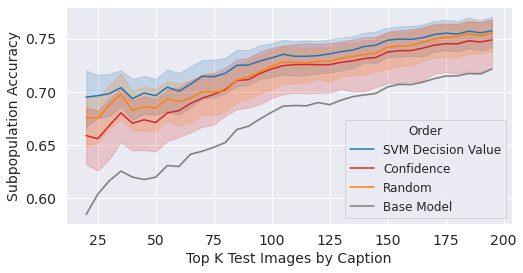

In [29]:
df = pd.concat(all_dfs).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.lineplot(data=df, x='Top K', y='Subpopulation Accuracy', hue='Order', ax=ax, 
             hue_order=['SVM Decision Value', 'Confidence', 'Random', 'Base Model'], 
            palette=[BLUE, RED, ORANGE, GRAY])
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles, labels=labels)
ax.set_xlabel("Top K Test Images by Caption")
plt.savefig(f'figures/cifar/intervention.pdf', bbox_inches='tight')
plt.show()

In [25]:
big_df = pd.concat(all_dfs)

In [78]:
big_df = pd.concat(all_dfs)
big_df[(big_df['Method'] == 'confs') & (big_df['K'] == 100)]

K Method  Subpopulation Accuracy
66  100     dv                   0.751
66  100     dv                   0.742
66  100     dv                   0.714
66  100     dv                   0.727
66  100     dv                   0.753

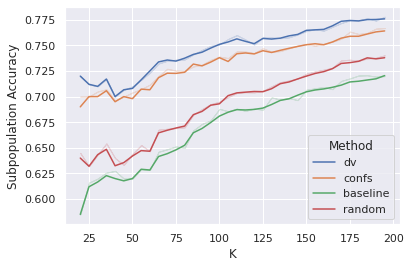

In [22]:
# Average over all classes
combined_df = pd.concat(dfs).reset_index()
sns.lineplot(data=combined_df, x='K', y='Subpopulation Accuracy', hue='Method', ci=False)
plt.show()

# Subset Intervention